# Proyecto Modulo 2
## Análisis financiero constructoras

### Objetivos
Una empresa hace una licitación para hacer construir un corporativo, esta empresa hace una licitación a 4 grandes empresas de construcción en el mundo y se les hará un análisis financiero en el cual se comprobará su estatus financiero actual. 

Empresas:
* Grupo Carso, S.A.B. de C.V.
* Desarrolladora Homex, S.A.B. de C.V.
* Promotora y Operadora de Infraestructura, S. A. B. de C. V.
* Obrascon Huarte Lain, S.A.

#### Objetivos Generales
* Comparar las empresas Grupo Carso, Homex, Pinfra y OHL en cuestión financiera.
* Observar cual muestra un mejor desarrollo monetario hablando en cuestión de finanzas.

#### Objetivos Específicos
* Comparar el desarrollo en la bolsa de cada una de las empresas dichas.
* Comparar los precios de las acciones de estas empresas.

## Modelo del problema

### Probabilidad Precio-Umbral

Descargaremos datos de los precios ajustados al cierre desde **yahoo finance** de los activos: **Grupo Carso, Homex, Pinfra y OHL**. Todo esto se pondrá en un DataFrame de **pandas** con ayuda del módulo **pandas-datareader**.

Consideraremos como fecha de inicio el 1-Enero-2016 y fecha final el 31-Diciembre-2018.

Graficaremos los datos obtenidos en un mismo gráfico


## Solución del problema

In [1]:
#Importamos librerías
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Función para descargar los datos ajustados de yahoo finance
def get_closes(names, start_date, end_date):
    closes = web.DataReader(name=names,
                           data_source="yahoo",
                           start=start_date,
                           end=end_date)
    return closes['Adj Close']

In [7]:
#Precios
names = ['GCARSOA1.MX','HOMEX.MX','PINFRA.MX','OHL.MC']
start, end = '2010-01-01', '2018-12-31'
closes = get_closes(names=names, start_date=start, end_date=end)

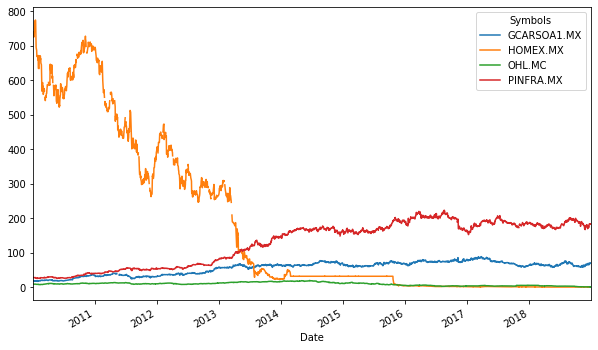

In [8]:
# Gráfico
closes.plot(figsize=(10,6));

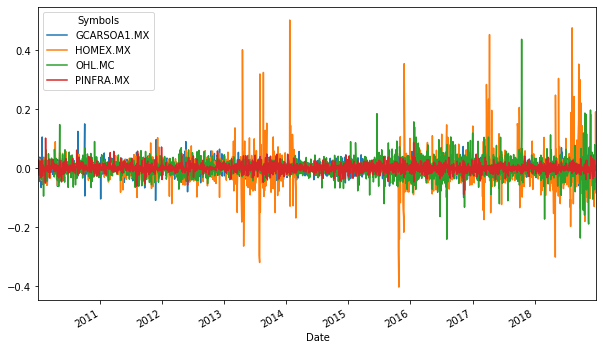

In [9]:
# Rendimientos porcentuales diarios
ret = closes.pct_change().dropna()
ret.plot(figsize=(10,6));

In [18]:
# Media y desviación estándar de cada activo
mu_G, mu_H, mu_PI, mu_O = ret.mean()["GCARSOA1.MX"],ret.mean()["HOMEX.MX"],ret.mean()["PINFRA.MX"],ret.mean()["OHL.MC"]
mu_G, mu_H, mu_PI, mu_O 

(0.0007873763014415237,
 -0.00247341133210077,
 0.0009215661212506175,
 -0.0006159379262645939)

In [21]:
s_G, s_H, s_PI, s_O = ret.std()["GCARSOA1.MX"],ret.std()["HOMEX.MX"],ret.std()["PINFRA.MX"],ret.std()["OHL.MC"]
s_G, s_H, s_PI, s_O

(0.01971624504155513,
 0.04963425952121912,
 0.01412488569515251,
 0.03198505306845334)

Simulamos 1000 escenarios de rendimientos diarios para el 2018 (para cada una de las empresas)

In [24]:
# Función que simula varios escenarios de rendimientos diarios
def ret_sim(mu, sigma, ndays, nscen, start_date):
    dates = pd.date_range(start=start_date,periods=ndays)
    return pd.DataFrame(data = sigma*np.random.randn(ndays, nscen)+mu, index = dates)

In [25]:
# Simulación de rendimientos para cada empresa
simret_G = ret_sim(mu_G, s_G, 365, 1000, '2018-01-01')
simret_H = ret_sim(mu_H, s_H, 365, 1000, '2018-01-01')
simret_PI = ret_sim(mu_PI, s_PI, 365, 1000, '2018-01-01')
simret_O = ret_sim(mu_O, s_O, 365, 1000, '2018-01-01')

Calculamos los precios con base en los rendimientos simulados

In [28]:
# Obtenemos los precios
simcloses_G = closes.iloc[-1]['GCARSOA1.MX']*((1+simret_G).cumprod())
simcloses_H = closes.iloc[-1]['HOMEX.MX']*((1+simret_H).cumprod())
simcloses_PI = closes.iloc[-1]['PINFRA.MX']*((1+simret_PI).cumprod())
simcloses_O = closes.iloc[-1]['OHL.MC']*((1+simret_O).cumprod())

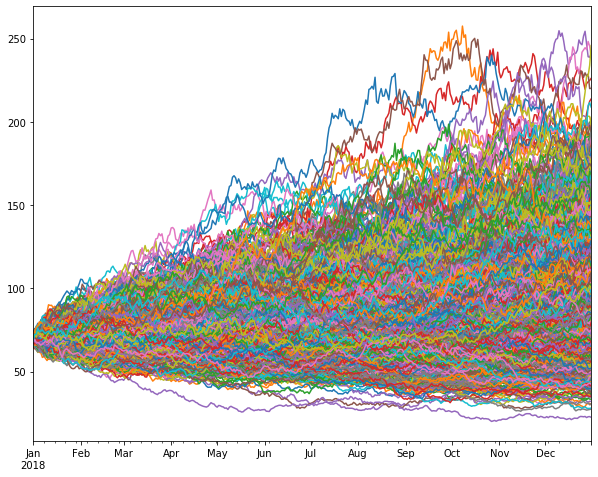

In [29]:
simcloses_G.plot(figsize=(10,8),legend=False);

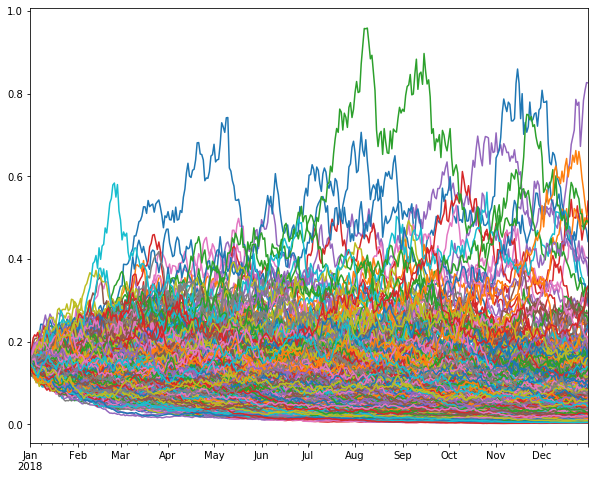

In [30]:
simcloses_H.plot(figsize=(10,8),legend=False);

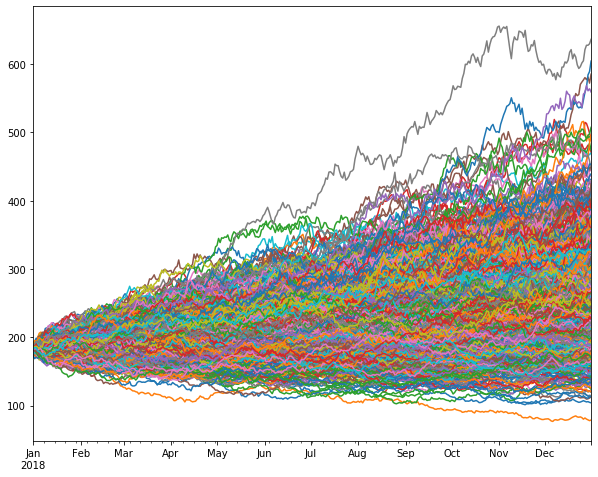

In [31]:
simcloses_PI.plot(figsize=(10,8),legend=False);

In [ ]:
simcloses_O.plot(figsize=(10,8),legend=False);